In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [3]:
from csv import writer
from csv import reader
default_text = 'NaN'
with open('/content/survey lung cancer.csv', 'r') as read_obj, open('data1.csv', 'w', newline='') as write_obj:
    # Create a csv.reader object from the input file object
    csv_reader = reader(read_obj)
    # Create a csv.writer object from the output file object
    csv_writer = writer(write_obj)
    # Read each row of the input csv file as list
    for row in csv_reader:
        # Append the default text in the row / list
        row.append(default_text)
        # Add the updated row / list to the output file
        csv_writer.writerow(row)
output_data=pd.read_csv('/content/survey lung cancer.csv')
output_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
data = pd.read_csv('data1.csv')

In [5]:
print(data.shape)
print(data.head(5))

(309, 17)
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  NaN  
0                    2       

In [6]:
# To display the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 309 non-null    object 
 1   AGE                    309 non-null    int64  
 2   SMOKING                309 non-null    int64  
 3   YELLOW_FINGERS         309 non-null    int64  
 4   ANXIETY                309 non-null    int64  
 5   PEER_PRESSURE          309 non-null    int64  
 6   CHRONIC DISEASE        309 non-null    int64  
 7   FATIGUE                309 non-null    int64  
 8   ALLERGY                309 non-null    int64  
 9   WHEEZING               309 non-null    int64  
 10  ALCOHOL CONSUMING      309 non-null    int64  
 11  COUGHING               309 non-null    int64  
 12  SHORTNESS OF BREATH    309 non-null    int64  
 13  SWALLOWING DIFFICULTY  309 non-null    int64  
 14  CHEST PAIN             309 non-null    int64  
 15  LUNG_C

In [7]:
data.isnull().sum()

GENDER                     0
AGE                        0
SMOKING                    0
YELLOW_FINGERS             0
ANXIETY                    0
PEER_PRESSURE              0
CHRONIC DISEASE            0
FATIGUE                    0
ALLERGY                    0
WHEEZING                   0
ALCOHOL CONSUMING          0
COUGHING                   0
SHORTNESS OF BREATH        0
SWALLOWING DIFFICULTY      0
CHEST PAIN                 0
LUNG_CANCER                0
NaN                      309
dtype: int64

In [14]:
# Here we are setting the lung cancer column to 0 if he/she doesn't have 
# lung cancer else 1
data['LUNG_CANCER'] = data['LUNG_CANCER'].apply(lambda x: 0 if x=='NO' else 1) 
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,NaN
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,NaN
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,NaN
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,NaN
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,NaN
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,NaN


In [15]:
y = data['LUNG_CANCER']
X = data.drop(['LUNG_CANCER','GENDER','NaN'], axis = 1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [17]:
#Linear Regression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
pred = model.predict(X_test)
y_pred1 = [ 0 if x < 0.5 else 1 for x in pred]
y_pred1

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1]

In [19]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [20]:
# Prediction
y_pred2 = log_model.predict(X_test)
y_pred2

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1])

In [21]:
#Confusion Matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_test,y_pred1) # This is from the linear regression
cm2= confusion_matrix(y_test,y_pred2) # y_pred2 This is for Logistic Regression
print("Confusin Matrix: ")
print(cm1)
print(cm2)

Confusin Matrix: 
[[  9  11]
 [  4 131]]
[[ 10  10]
 [  3 132]]


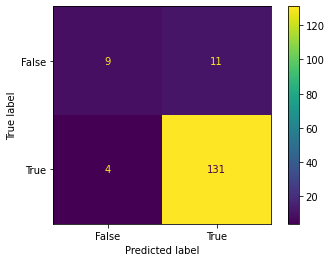

In [22]:
#Linear Regression Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels =[False,True])
cm_display.plot()
plt.show()

In [23]:
#Print Accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.9032258064516129


0.7101851851851851


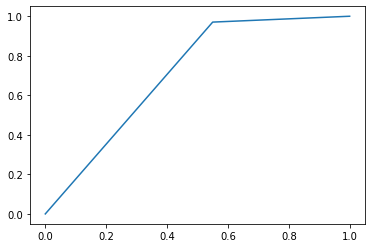

In [24]:
#ROC Curve -Linear
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.plot(false_positive_rate,true_positive_rate)

0.7388888888888889


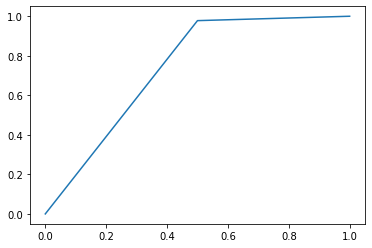

In [25]:
#ROC Curve Logistic 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.plot(false_positive_rate,true_positive_rate)

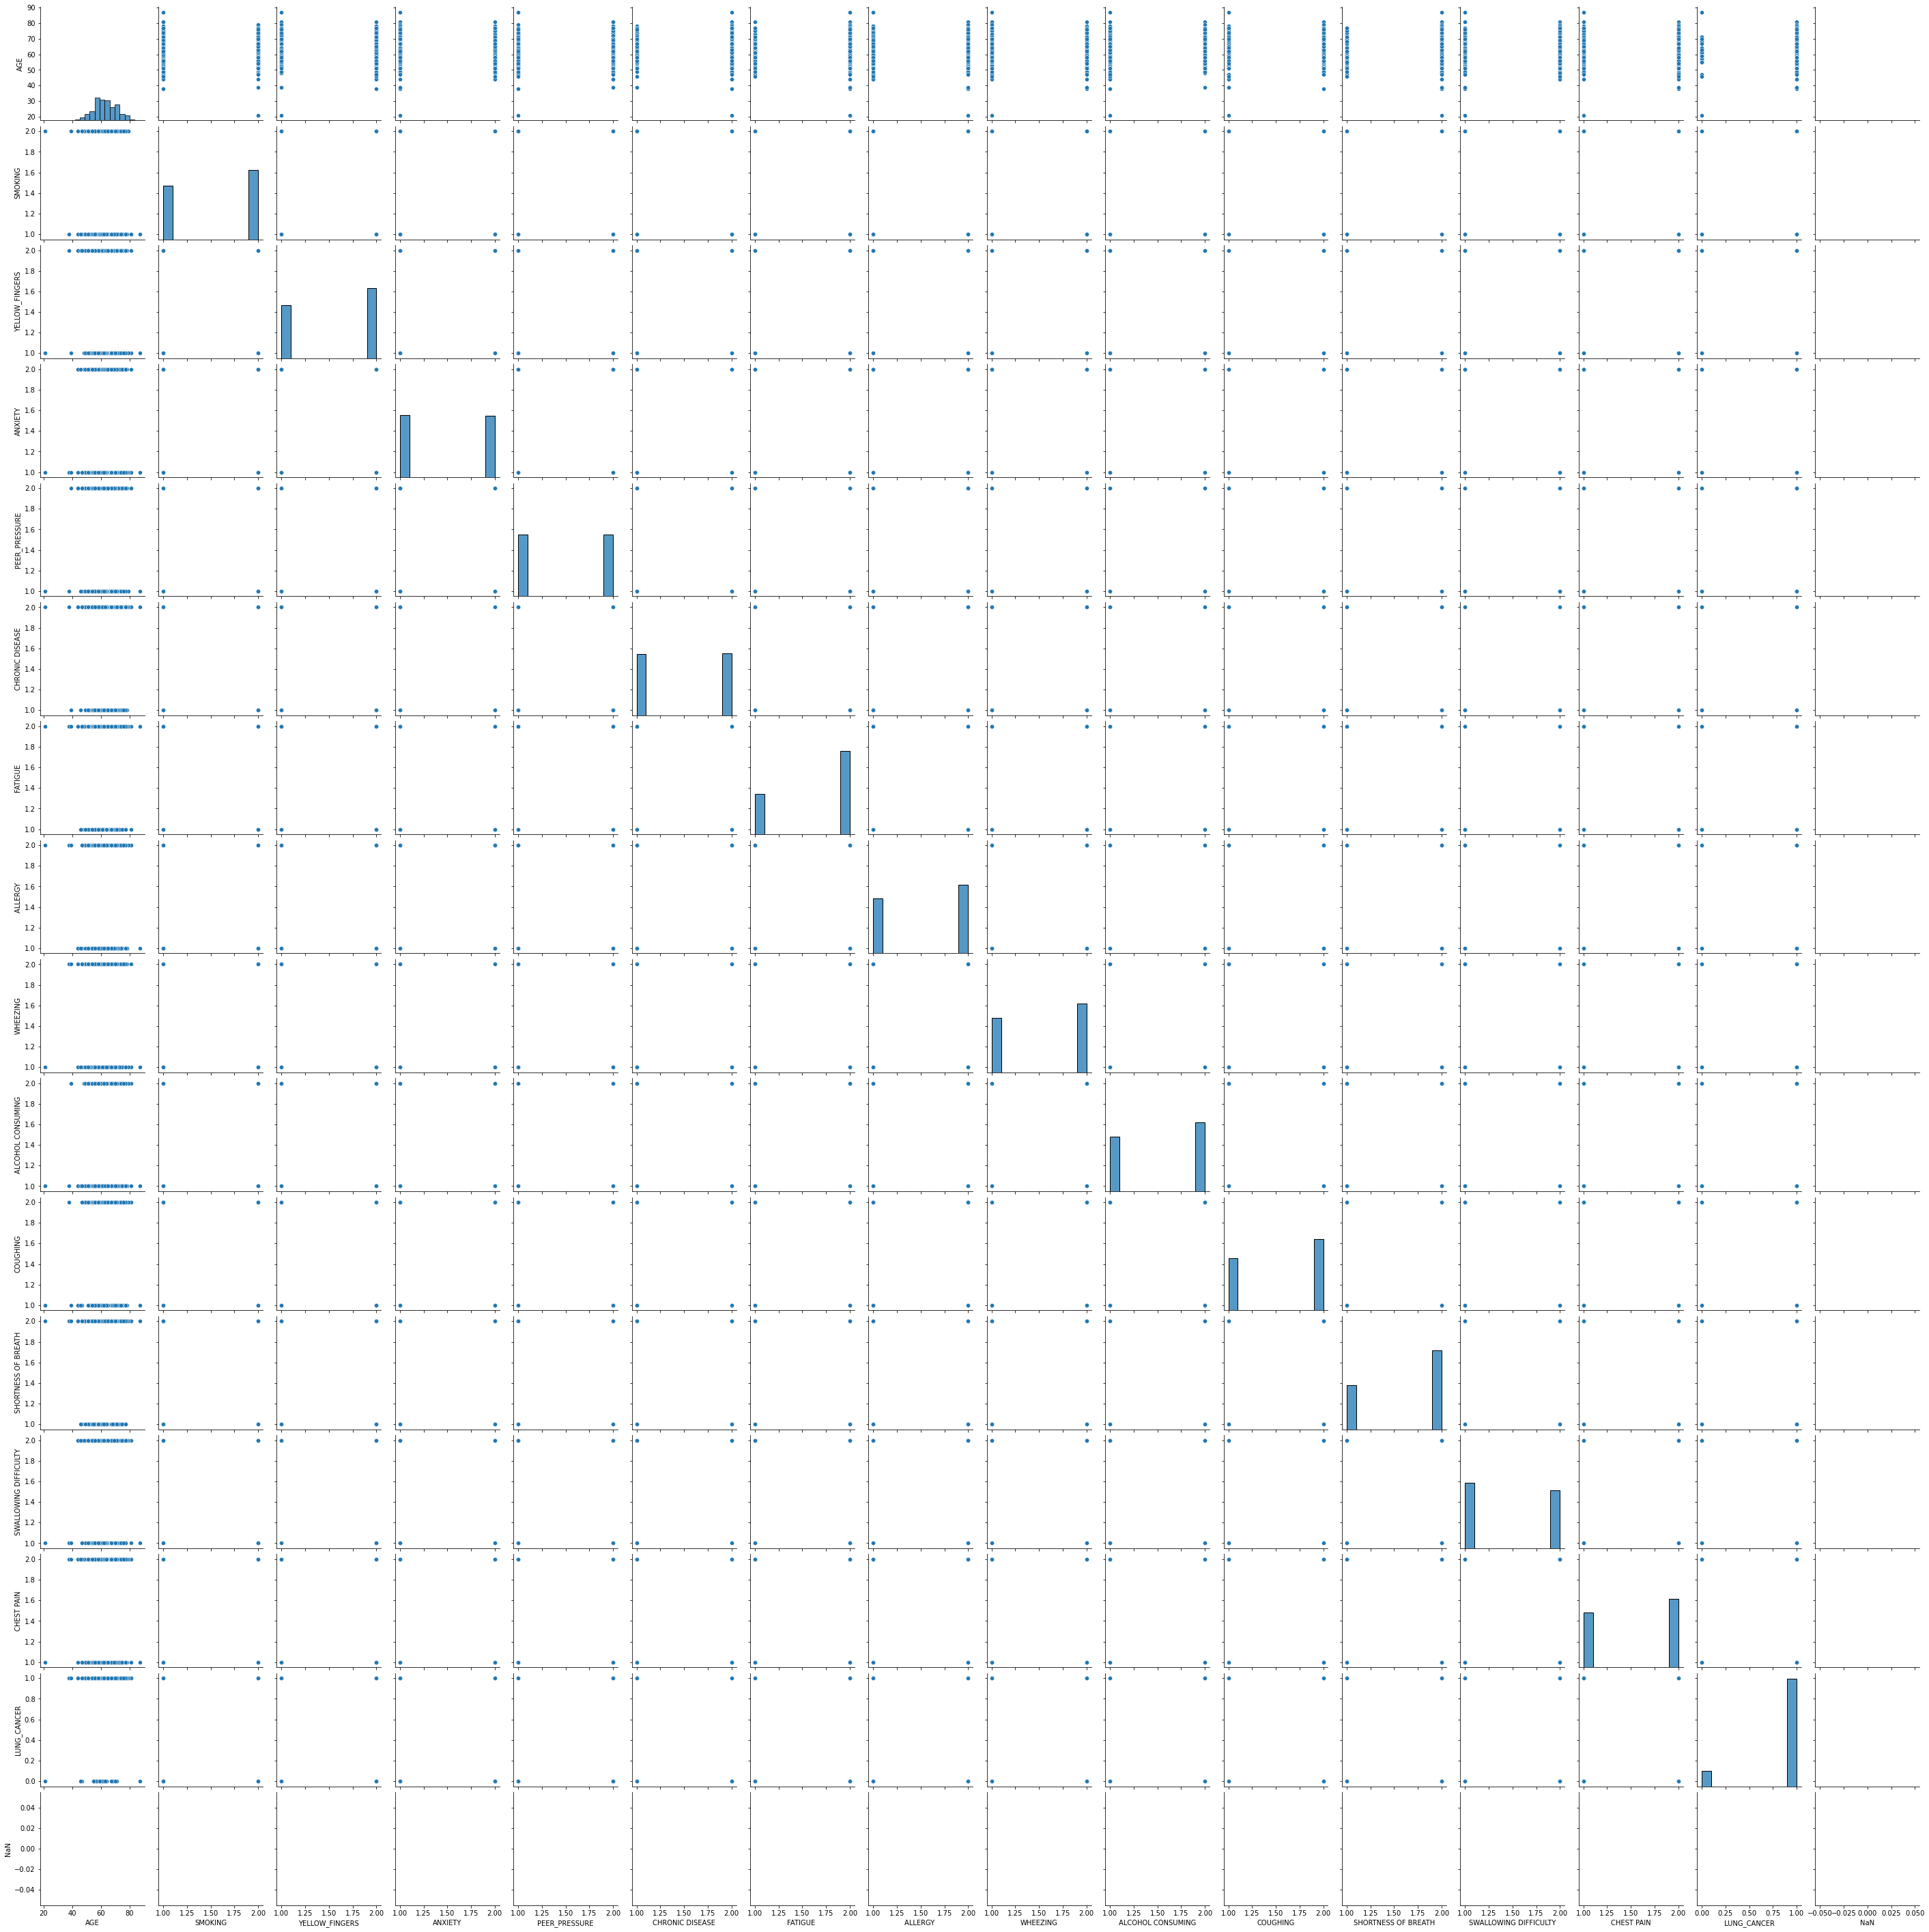

In [26]:
# To display all graphs and this will consume a lot of System Resources run with caution
sns.pairplot(data)
plt.show()